<a href="https://colab.research.google.com/github/DikshantPatel2210/Credit-Cards-Fraud-Detection/blob/main/Credit_Cart_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest , f_classif , mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,precision_score,recall_score,f1_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("/content/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Basic Analysis

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##Data Distribution
Analysis : Totally Imbalance

Class
0    284315
1       492
Name: count, dtype: int64
 Class '0' Percentage :  99.83% 
 Class '1' Percentage :  0.17% 


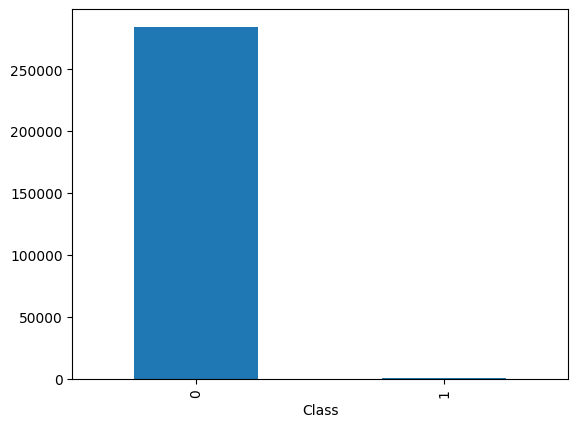

In [ ]:
df["Class"].value_counts().plot(kind = "bar")
print(df["Class"].value_counts())
for index , percentage in (df["Class"].value_counts(normalize= True)*100).items():
  print(f" Class '{index}' Percentage :  {percentage:.2f}% ")

###missing Value
Analysis : 0 missing value

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

###Describtion

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


###Duplicate Rows
Analysis : 1081 duplicate rows out of whole dataset

In [ ]:
df.duplicated().sum()

1081

In [ ]:
df.drop_duplicates(inplace= True)

###Correlation
Analysis : feature between v19 and v28 have no impactfully effect on Class feature.wherease V19 to v23 are som short of relation with amount features.

And Also V24 ,V26, V27, V28 have barely connection with other features

Text(0.5, 1.0, 'Correlation with each other features')

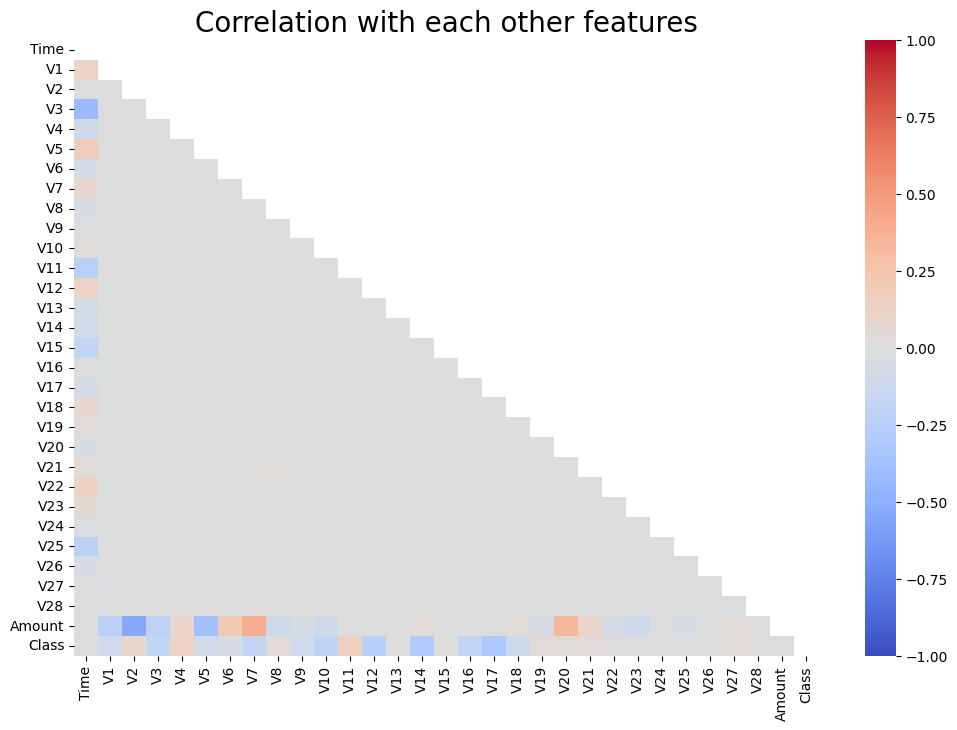

In [ ]:
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),mask = mask, vmin = -1 , vmax = 1 , cmap = "coolwarm")
plt.title("Correlation with each other features", fontsize = 20)

# Data Visualization

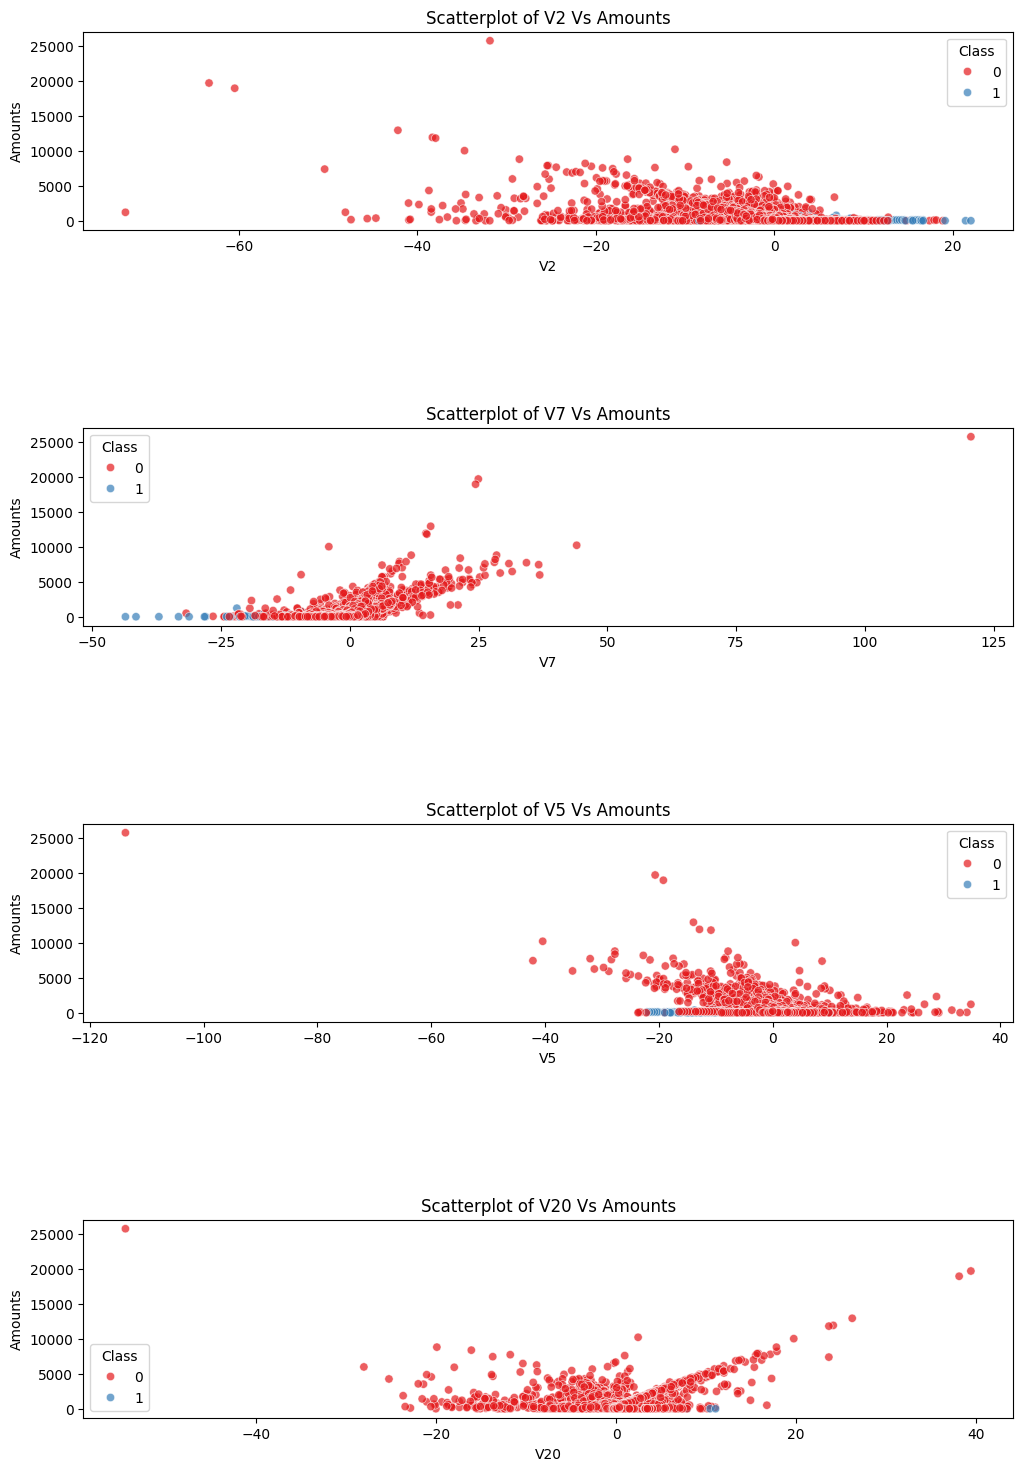

In [ ]:
Features = ["V2","V7","V5","V20"]
fig, axes = plt.subplots(nrows = 4 , ncols = 1 , figsize = (12,18))
axes =  axes.flatten()
for i , feature in enumerate(Features):
  sns.scatterplot(x = df[feature] , y = df["Amount"],hue = df["Class"] , palette='Set1', ax=axes[i], legend='full', alpha=0.7 )
  axes[i].set_title(f"Scatterplot of {feature} Vs Amounts")
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel("Amounts")
  axes[i].legend(title = "Class")
plt.subplots_adjust(hspace= 1)

we can see in pairplot that so many features have linear corraletion between each other.

#Data Preprocessing

In [ ]:
Numerical_features = df.drop(columns = ["Class"], axis = 1)

In [ ]:
scalar = StandardScaler()
X_Scaled = scalar.fit_transform(Numerical_features)

In [ ]:
selector = SelectKBest(score_func= mutual_info_classif, k = 23 )
X_selectioned = selector.fit(X_Scaled , y)

In [ ]:
X_selectioned

SelectKBest(k=23, score_func=<function mutual_info_classif at 0x7f7c02e10550>)

In [ ]:
X.columns.tolist()[1]

'V1'

In [ ]:
mask = selector.get_support()

# Get list of selected feature indices
selected_indices = np.where(mask)[0]

# Get list of selected feature names (if available)
selected_feature_names = [Numerical_features.columns.tolist()[i]for i in selected_indices]

print("Selected feature indices:", selected_indices)
print("Selected feature names:", selected_feature_names)

Selected feature indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 16 17 18 19 20 21 27 28 29]
Selected feature names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V27', 'V28', 'Amount']


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
new_df = df.drop(columns =(["V13", "V15", "V22","V23","V24","V25","V26"]) , axis = 1)
X = new_df.drop(columns= ["Class"])
y = df["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#LogesticRegression

#Random Forest

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred1 = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.99      0.74      0.85        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test , y_pred)
print(f"Accuracy_Score: {Accuracy_Score} ")
print(f"Accuracy_Score: {confusion_mat} ")

Accuracy_Score: 0.9995770627004547 
Accuracy_Score: [[56655     1]
 [   23    67]] 


#Combination of undersampling and oversampling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel = "sigmoid" , gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = "liblinear" , penalty = "l1")
rfc = RandomForestClassifier(n_estimators = 50 , random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50 , random_state = 2)
bc = BaggingClassifier(n_estimators= 50 , random_state = 2)
etc = ExtraTreesClassifier(n_estimators=50 , random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators=50 , random_state = 2)
xgb = XGBClassifier(n_estimators=50 , random_state = 2)

In [ ]:
clfs = {
    "SVC" : svc,
    "KN"  : knc,
    "NB"  : mnb,
    "DT"  : dtc,
    "LR"  : lrc,
    "RF"  : rfc,
    "adaBoost" : abc,
    "BgC"  : bc,
    "ETC"  : etc,
    "xgb" : xgb,

    }

In [ ]:
def train_classifier(clf,X_train, y_train, X_test, y_test ):
  clf.fit(X_resampled,y_resampled)
  y_pred121 =clf.predict(X_test)
  A = print(confusion_matrix(y_test, y_pred))

  return

In [ ]:
confusion_scores = []
for name, clf in clfs.items():
  A1 = train_classifier(clf, X_train, y_train, X_test, y_test)
  print("For", name)
  print("confusion_matrix-" ,A1)
  confusion_scores.append(A1)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter

In [ ]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Resampled training set class distribution:", Counter(y_resampled))

Resampled training set class distribution: Counter({1: 217484, 0: 209327})


In [ ]:
Rf_classifier = RandomForestClassifier()

In [ ]:
Rf_classifier.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [ ]:
y_pred_resampled = Rf_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_resampled))

[[56649     7]
 [   19    71]]


In [ ]:
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.91      0.79      0.85        90

    accuracy                           1.00     56746
   macro avg       0.95      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746



# Ensemble Method for Imbalance data

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
clf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

BalancedRandomForestClassifier(random_state=42)

In [ ]:
y_pred1 = rf_classifier.predict(X_test)

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred1)
Accuracy_Score = accuracy_score(y_test , y_pred1)
print(f"Accuracy_Score: {Accuracy_Score} ")
print(f"Accuracy_Score: {confusion_mat} ")

Accuracy_Score: 0.9995770627004547 
Accuracy_Score: [[56655     1]
 [   23    67]] 


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.99      0.74      0.85        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



#Synthetic Minority Over-sampling Technique

In [ ]:
X.value_counts()

Time      V1         V2         V3         V4         V5         V6         V7         V8         V9         V10        V11        V12        V14        V16        V17        V18        V19        V20        V21        V27        V28        Amount
0.0       -1.359807  -0.072781   2.536347   1.378155  -0.338321   0.462388   0.239599   0.098698   0.363787   0.090794  -0.551600  -0.617801  -0.311169  -0.470401   0.207971   0.025791   0.403993   0.251412  -0.018307   0.133558  -0.021053  149.62    1
128577.0   2.064946  -1.220602  -2.720084  -1.846070   1.820880   3.273309  -0.862146   0.728871  -0.499542   0.737309  -0.005048  -0.349295   0.068393   0.529603   0.366053  -2.033829   0.750950   0.157391   0.006482  -0.024853  -0.055415  79.00     1
128579.0  -0.091496   0.647387   0.446831  -0.559030  -0.445276   0.021171  -0.699942   0.782127   0.308637  -1.050558   0.883989   0.410977  -1.035580   1.787433  -0.255804   1.702687  -0.831639  -0.211408   0.391241   0.024109   0.082050  10.00

In [ ]:
y.value_counts()

Class
0        283253
1           473
Name: count, dtype: int64

In [ ]:
RF12 = RandomForestClassifier()

In [ ]:
X_train12, X_test12, y_train12, y_test12 = train_test_split(X, y, test_size=0.2, random_state=42)

y_train12.value_counts() , y_test12.value_counts()

(Class
 0        226597
 1           383
 Name: count, dtype: int64,
 Class
 0        56656
 1           90
 Name: count, dtype: int64)

In [ ]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled12, y_train_resampled12 = smote.fit_resample(X_train12, y_train12)

y_train_resampled12.value_counts()

Class
0        226597
1        226597
Name: count, dtype: int64

In [ ]:
RF12.fit(X_train_resampled12 , y_train_resampled12)

<ipython-input-289-60e4a2d7c400>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF12.fit(X_train_resampled12 , y_train_resampled12)


RandomForestClassifier()

In [ ]:
y_pred12 = RF12.predict(X_test12)

In [ ]:
print(classification_report(y_test12, y_pred12))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.92      0.78      0.84        90

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746

